# TF-IDF

TF-IDF je metóda hodnotenia relevancie pri vyhľadávaní textu. Vyjadruje dôležitosť slova v dokumente naprieč sadou dokumentov (korpusom).

**Definícia**
$$TFIDF_{i,j} = TF_{i,j} \times IDF_{i}$$

## TF - Term Frequency

TF zložka vyjadruje početnosť výrazu v ramci dokumentu. Väčšinou sa normalizuje, aby nedochádzalo k nadhodnocovaniu dlhých dokumentov.

**Definícia**
$$TF_{i,j} = \frac{n_{i,j}}{\sum ^{n}_{k} n_{k,j}}$$

kde:
 - $n_{i,j}$ je počet výskytov slova $t_{i}$ v dokumente $d_{j}$
 - $\sum ^{n}_{k} n_{k,j}$ reprezentuje súčet počtu výskytov všetkých slov v dokumente $d_{j}$, teda jeho dĺžku

## IDF - Inverse Document Frequency

IDF zložka reprezentuje dôležitosť slova v dokumente. Čím menej sa slovo v dokumente vyskytuje, tým viac je dôležité.

**Definícia**
$$IDF_{i} = \log\frac{|D|}{|\{j:t_{i}\in d_{j}\}|}$$

kde:
 - $|D|$ predstavuje veľkosť databázy prehľadávaných dokumentov (počet)
 - $|\{j:t_{i}\in d_{j}\}|$  predstavuje počet dokumentov, ktoré obsahujú slovo $i$

# Implementácia v Python

In [1]:
# Nainstalujeme si pripadne chybajuce zavislosti
%pip install pandas nltk scikit-learn matplotlib

Note: you may need to restart the kernel to use updated packages.


Na načítanie vstupného datasetu použijeme knižnicu _pandas_.  
Odfiltrujeme si len pravdivé články o Covid-19, ktoré použijeme ako korpus.

In [2]:
import pandas as pd

df = pd.read_excel('data/fake_new_dataset.xlsx', usecols=[1, 2, 4])
df = df.query('label == 1')
df['texts'] = df['title'] + ' ' + df['text']
df['texts'] = df['texts'].str.strip()

df = df[['title', 'texts']]

df.head()

,title,texts
1,Other Viewpoints: COVID-19 is worse than the flu,Other Viewpoints: COVID-19 is worse than the f...
2,Bermuda's COVID-19 cases surpass 100,Bermuda's COVID-19 cases surpass 100 The Minis...
6,Delhi: Eight nurses test positive for Covid-19...,Delhi: Eight nurses test positive for Covid-19...
8,Mississippi man recovering at home after 21 da...,Mississippi man recovering at home after 21 da...
20,Eight nurses test positive for Covid-19 at Kal...,Eight nurses test positive for Covid-19 at Kal...


Následne si predspracujeme vstupné dáta pomocou knižnice _Natural Language Toolkit_.  
Stiahneme si zoznam _stopwords_ obsahujúci slová typu 'a', 'the' a podobne, ktoré sú pre extrakciu kľúčových slov irelevantne.  
Takisto pripojíme špecifické slová pre pandémiu Covid-19, ktoré taktiež nechceme, lebo by nám skreslovali výsledky.

In [3]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

from nltk.corpus import stopwords

stop_words = stopwords.words('english') + ['covid', 'covid', 'coronavirus', 'corona', '19', '2019', 'ncov']

[nltk_data] Downloading package stopwords to /home/godric/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/godric/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Pre extrakciu kľúčových slov použijeme _TfidfVectorizer_ z knižnice _sklearn_.  
Parametre sme zvolili nasledovne:
* max_features = 30 - Chceme top 30 kľúčových slov
* min_df = 0.1 - ignoruj termy vyskytujuce sa v menej ako 10% článkov
* ngram_range = (2, 3) - Hľadáme bigramy a trigramy
* lowercase = True  - Chceme aby samotná metóda previedla text na malé písmená
* stop_words = stop_words - Definujeme naše stop slová, ktoré majjú byť vylúčené zo spracovania

In [9]:

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    max_features=30,
    min_df=0.1,
    ngram_range=(2, 3),
    lowercase=True,
    stop_words=stop_words
)

vectors = tfidf.fit_transform(df['texts'].values.tolist())
feature_names = tfidf.get_feature_names_out()
dense = vectors.todense()
denselist = dense.tolist()

all_keywords = []

for description in denselist:
    x = 0
    keywords = []
    for word in description:
        if word > 0:
            keywords.append(feature_names[x])
        x = x + 1
    all_keywords.append(keywords)

df2 = pd.DataFrame(denselist, columns=feature_names)
df2.tail()

,acute respiratory,acute respiratory syndrome,confirmed cases,disease control,health emergency,health organization,hong kong,hubei province,new virus,public health,respiratory syndrome,severe acute,severe acute respiratory,spread virus,united states,world health,world health organization,wuhan china
2056,0.000000,0.000000,0.00000,0.626588,0.000000,0.000000,0.000000,0.000000,0.0,0.508892,0.000000,0.000000,0.00000,0.0,0.590268,0.000000,0.000000,0.0
2057,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.701099,0.713064,0.0,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.0
2058,0.000000,0.000000,0.00000,0.000000,0.524255,0.000000,0.000000,0.000000,0.0,0.851561,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.0
2059,0.216259,0.245861,0.20207,0.000000,0.483352,0.199848,0.000000,0.000000,0.0,0.392560,0.482726,0.241363,0.24199,0.0,0.000000,0.184347,0.201137,0.0
2060,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,1.0


Pomocou k-means clusteringu skúsime zistiť, či nedochádza v rámci jednotlivých článkov k prekryvaniu kľúčových slov.

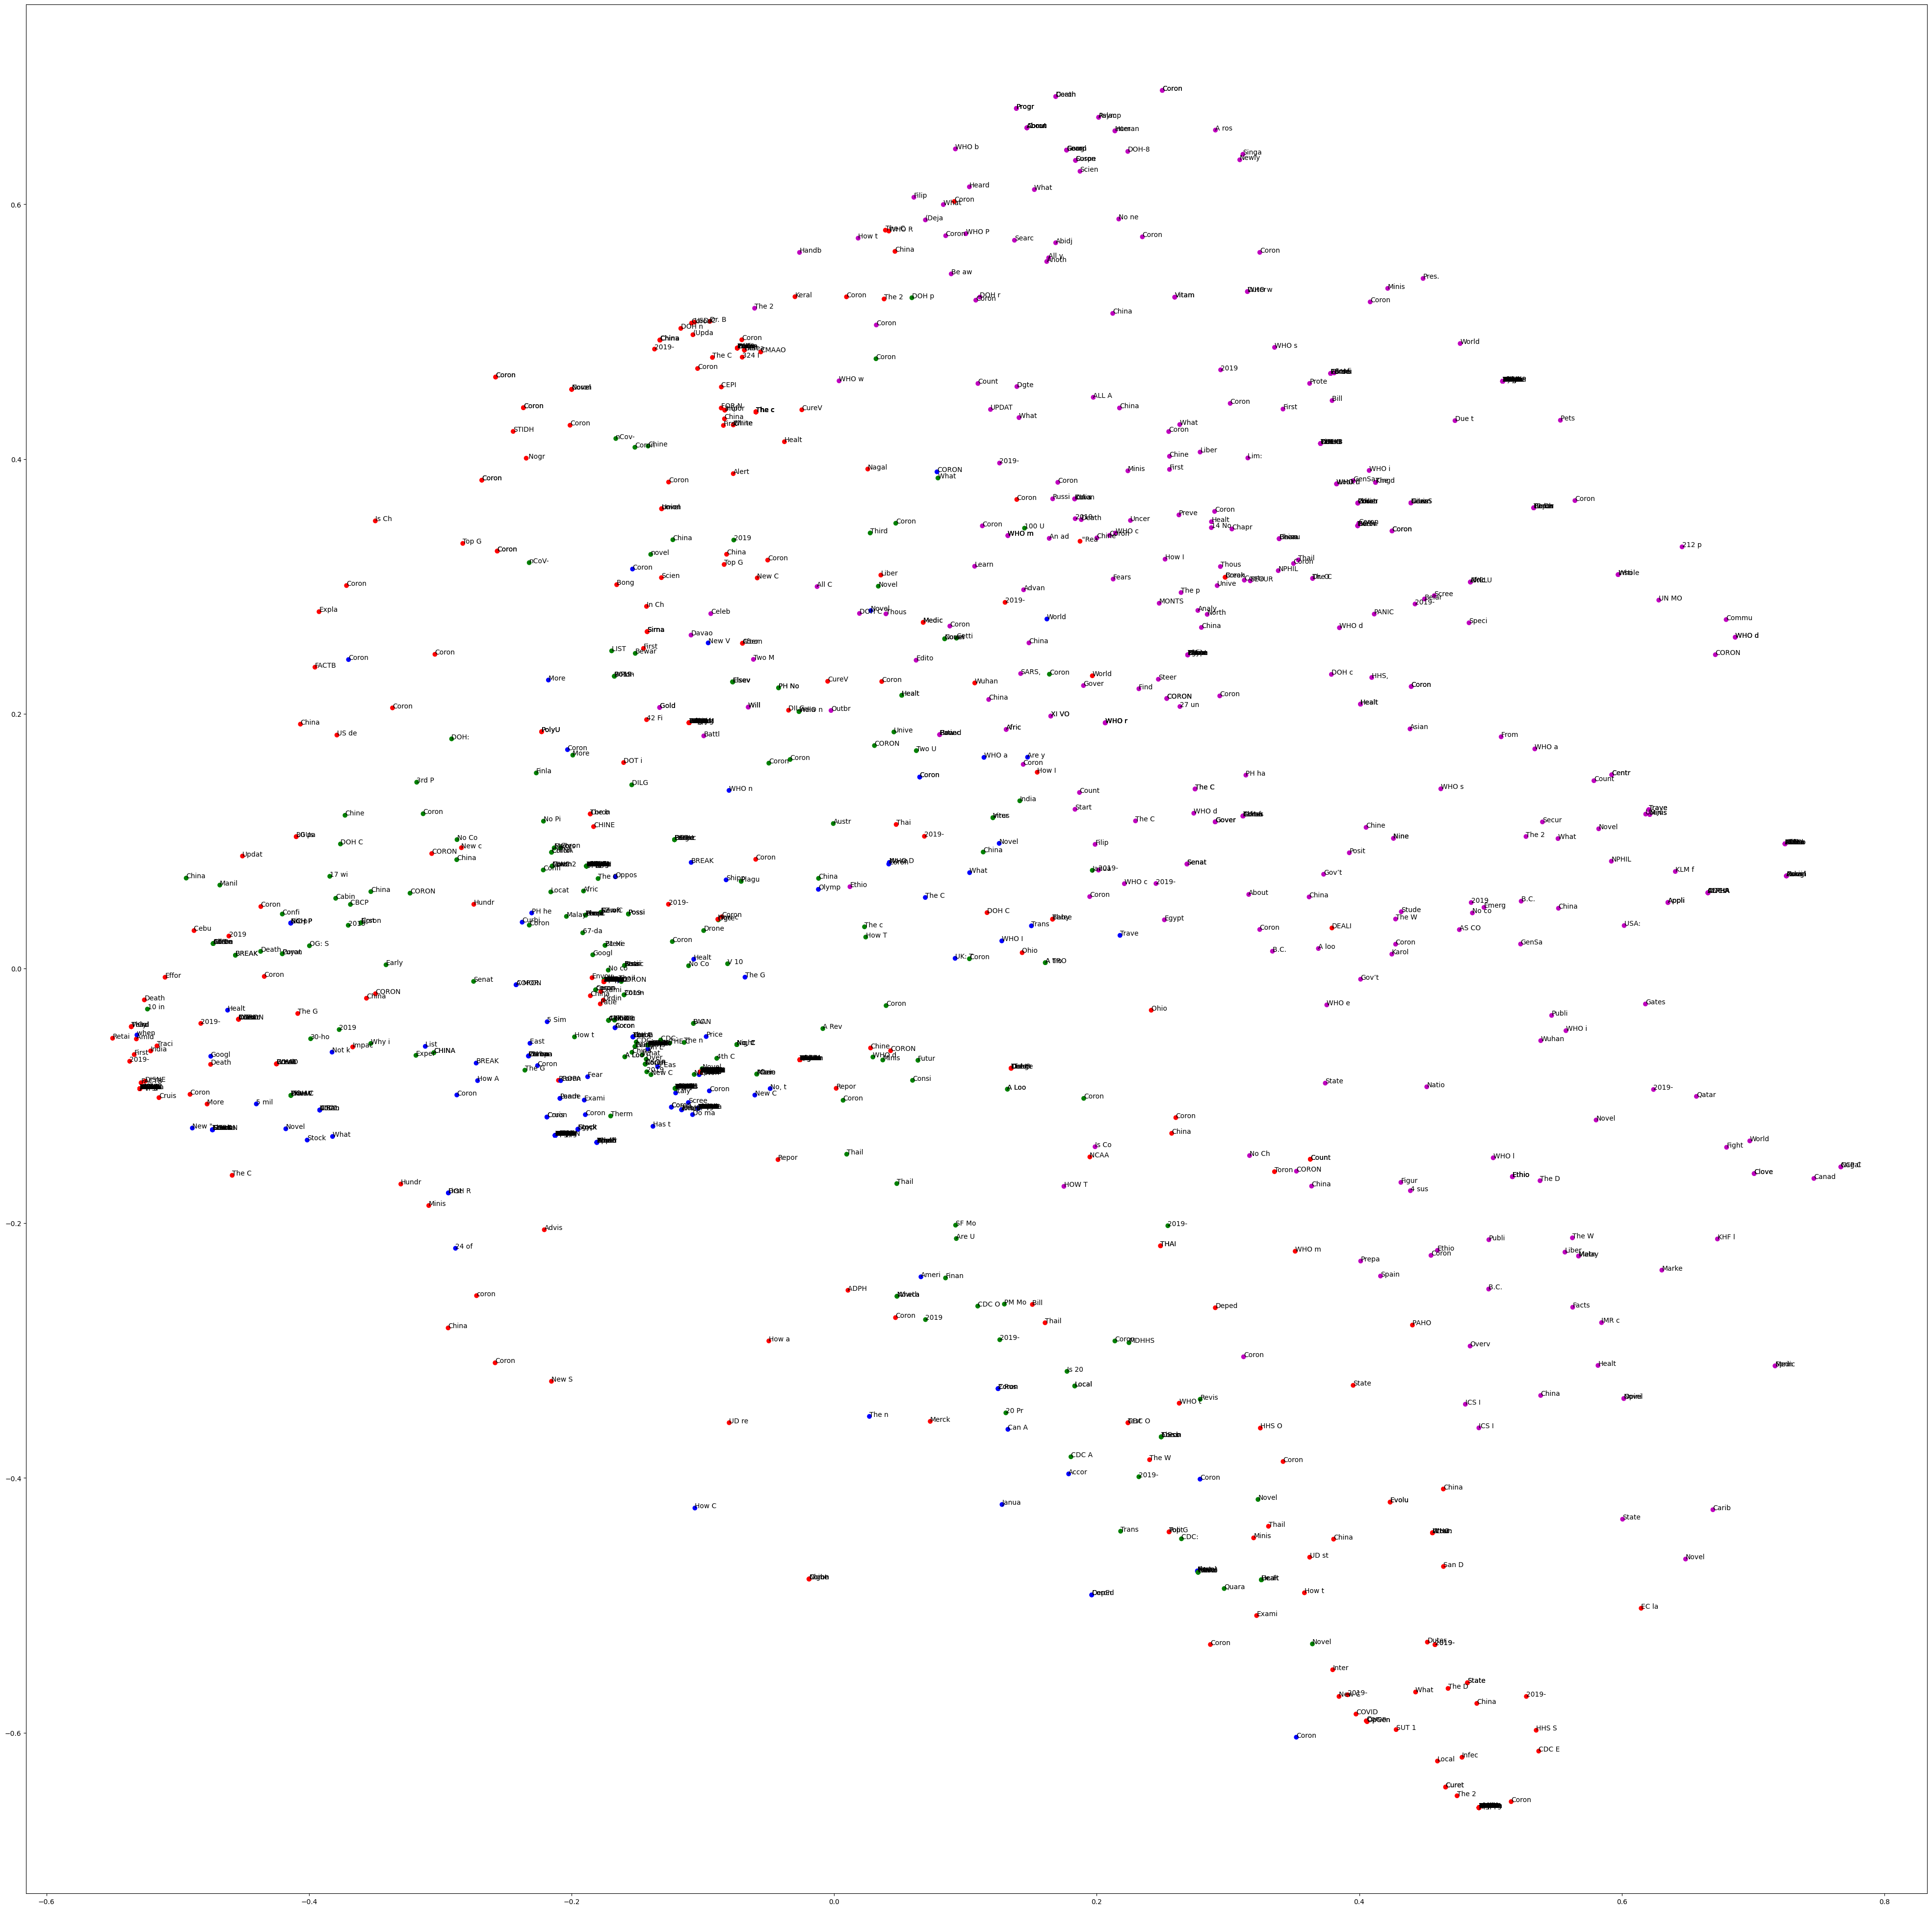

In [5]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

true_k = 4

model = KMeans(n_clusters=true_k, init="k-means++", max_iter=100, n_init=1)
model.fit(vectors)

order_centroinds = model.cluster_centers_.argsort()[:, ::-1]
terms = tfidf.get_feature_names_out()

with open("data/trc_results.txt", "w", encoding="utf-8") as f:
    for i in range(true_k):
        f.write(f"Cluster {i}")
        f.write("\n")
        for ind in order_centroinds[i, :20]:
            f.write(' %s' % terms[ind],)
            f.write("\n")
        f.write("\n")
        f.write("\n")

kmean_indicies = model.fit_predict(vectors)

pca = PCA(n_components=2)

scatter_plot_points = pca.fit_transform(vectors.toarray())

colors = ["b", "g", "r", 'm']

x_axis = [o[0] for o in scatter_plot_points]
y_axis = [o[1] for o in scatter_plot_points]

fig, ax = plt.subplots(figsize=(50,50))

ax.scatter(x_axis, y_axis, c=[colors[d] for d in kmean_indicies])

for i, txt in enumerate(df['title'].values.tolist()):
    ax.annotate(txt[0:5], (x_axis[i], y_axis[i]))

plt.savefig("data/trc_figure.png")